In [1]:
import numpy as np

In [2]:
import pandas as pd

/Users/shahrukhkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shahrukhkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('spam.csv', encoding_errors='ignore')



In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()     # data description analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) # data cleaning from raw data



In [7]:
df



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1':'target','v2':'text'} ,inplace=True)

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder  # using as target is categorical 
lbe=LabelEncoder()                                

In [12]:
df['target']=lbe.fit_transform(df['target'])   # changing target to numeric

In [13]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
#check for missing values or duplicated values
df.isnull().sum()    #here no missing values
df.duplicated().sum()   #404 duplicated values

404

In [15]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.shape    # data cleaning is done

(5168, 2)

# EDA


In [17]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

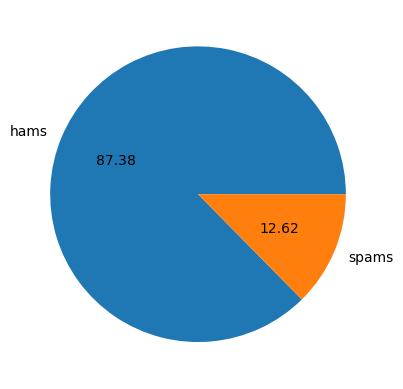

In [19]:
plt.pie(df['target'].value_counts(),labels=['hams','spams'],autopct="%0.2f") # bird view visualisation of given data
plt.show()

In [20]:
# We can see there is imbalance in data !!!!

In [21]:
import nltk      #nlp packeges to deal with the texts 
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shahrukhkhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#will try to create some new columns

In [23]:
#number of characters in each messages
df['num_char']=df['text'].apply(len)

/var/folders/jv/gzvlld9j49lf9fdfws1_ncp00000gn/T/ipykernel_12586/2747545294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


In [24]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words in each messages

In [26]:
df['num_words']=df['text'].apply(lambda x:nltk.word_tokenize(x))

/var/folders/jv/gzvlld9j49lf9fdfws1_ncp00000gn/T/ipykernel_12586/1863903728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:nltk.word_tokenize(x))


In [27]:
df['num_words']=df['num_words'].apply(len)

/var/folders/jv/gzvlld9j49lf9fdfws1_ncp00000gn/T/ipykernel_12586/694517639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['num_words'].apply(len)


In [28]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#no. of sentences in each messages

In [30]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/jv/gzvlld9j49lf9fdfws1_ncp00000gn/T/ipykernel_12586/427732136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
#thus we created new features from already existing features

In [33]:
df[['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.438661,1.947949
std,58.104099,13.327619,1.363277
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#lets describe seprately for ham and spams

In [35]:
df[df['target']==0][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.106067,1.799380
std,56.328803,13.494482,1.277997
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
df[df['target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.976994
std,29.937352,7.015283,1.486578
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,8.000000


In [37]:
#histogram plot for spam and ham messages


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.7.0 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


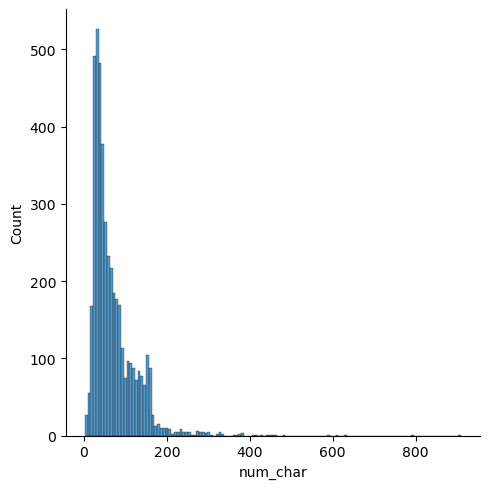

In [38]:
import seaborn as sns


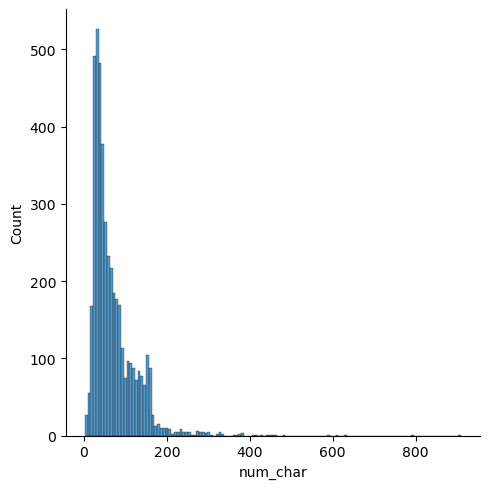

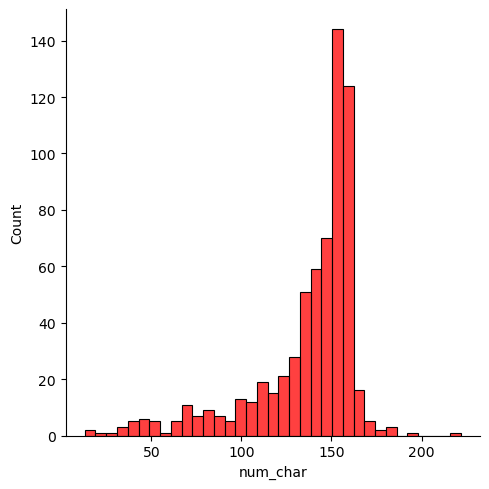

In [39]:
sns.displot(df[df['target']==0]['num_char'])
sns.displot(df[df['target']==1]['num_char'],color='red')

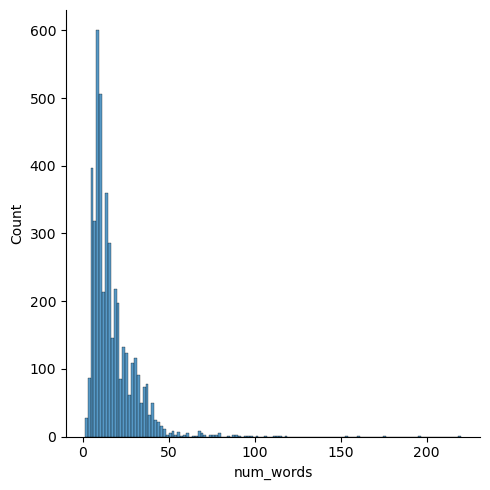

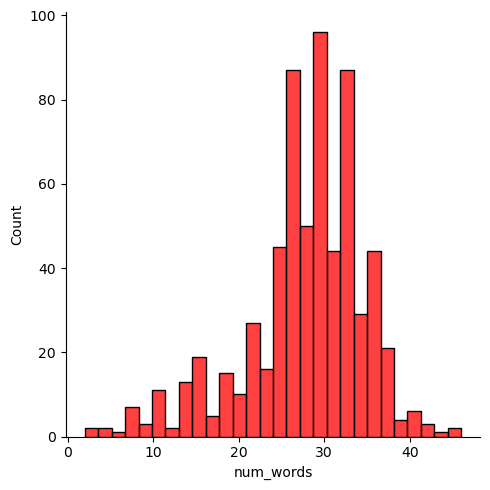

In [40]:
sns.displot(df[df['target']==0]['num_words'])
sns.displot(df[df['target']==1]['num_words'],color='red')

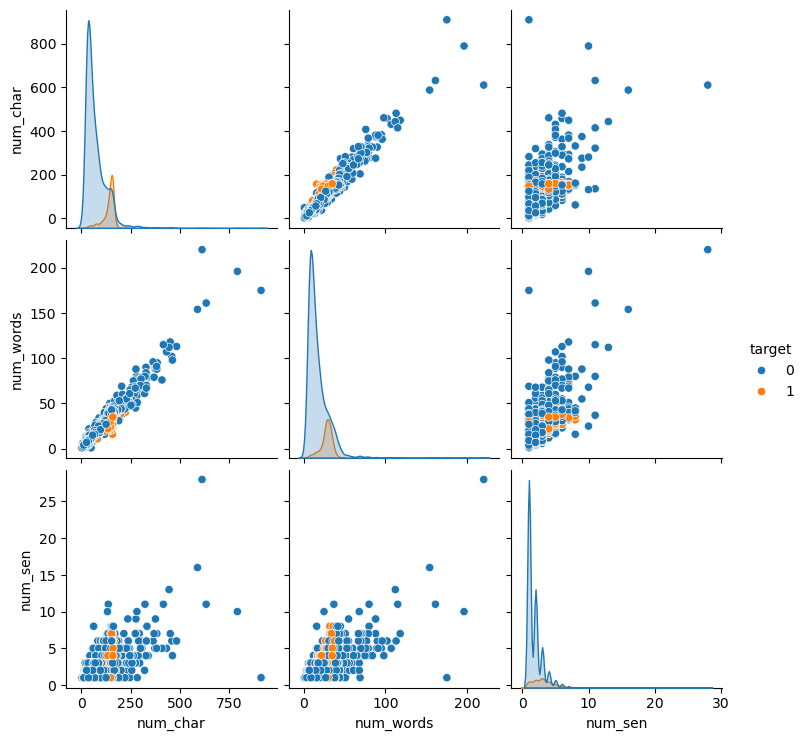

In [41]:
# check relation between columns 
sns.pairplot(df,hue='target')

In [45]:
# studying correlation between columns 
numeric_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
numeric_df.corr()

,target,num_char,num_words,num_sen
target,1.000000,0.381208,0.263172,0.286840
num_char,0.381208,1.000000,0.966345,0.638309
num_words,0.263172,0.966345,1.000000,0.684786
num_sen,0.286840,0.638309,0.684786,1.000000


<AxesSubplot:>

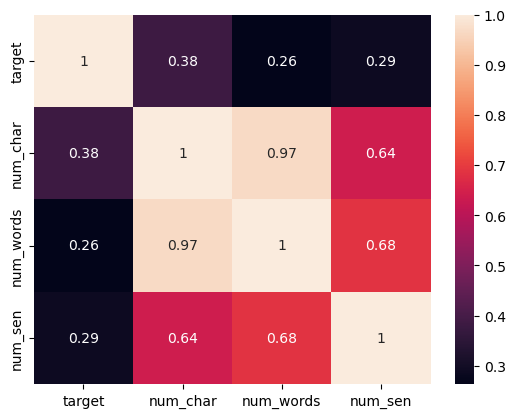

In [47]:
sns.heatmap(numeric_df.corr(),annot=True)

In [48]:
# we cannot take all columns due to strong correlation between them , case of multicollinearity
#num_char is best choice since it has better correlation with target than others

# DATA PREPROCESSING 

In [49]:
# data preprocessing necessory for messages refining 

In [50]:
# we will create single function to implement this all

In [60]:
transform_text('do you go to google ?')


['go', 'google']

In [57]:
from nltk.corpus import stopwords# these are unecessory words
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
import string       # these are unecessory words
string .punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
from nltk.stem.porter import PorterStemmer    #importing for stemming
ps=PorterStemmer()

In [64]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) # to make list words
    y=[]
    for i in text:   # to remove special words like %% & etc
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string .punctuation: # to remove punctuation and stopwords
            y.append(i)
    text=y[:]
    y.clear()    
    
    for i in text:
        y.append(ps.stem(i))   #to stem each word
    return " ".join(y)  # return string 

In [66]:

transform_text('hello lets go to party and dance !!!!')  #check function

'hello let go parti danc'

In [67]:
# lets update our text messages in dataframe now 

In [70]:
df['transformed_text']=df['text'].apply(transform_text)

/var/folders/jv/gzvlld9j49lf9fdfws1_ncp00000gn/T/ipykernel_12586/4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [72]:
df

,target,text,num_char,num_words,num_sen,transfor_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,guy bitch act like interest buy someth els nex...


In [71]:
# with the help of word cloud we will se most frequent word in spam 

In [78]:
from wordcloud import WordCloud
wc=WordCloud(width=500 ,height=500 ,min_font_size=10,background_color='white')
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

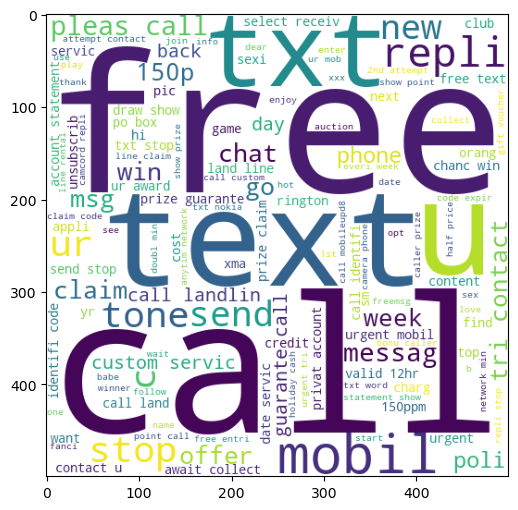

In [80]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [81]:
# with the help of word cloud we will se most frequent word in ham

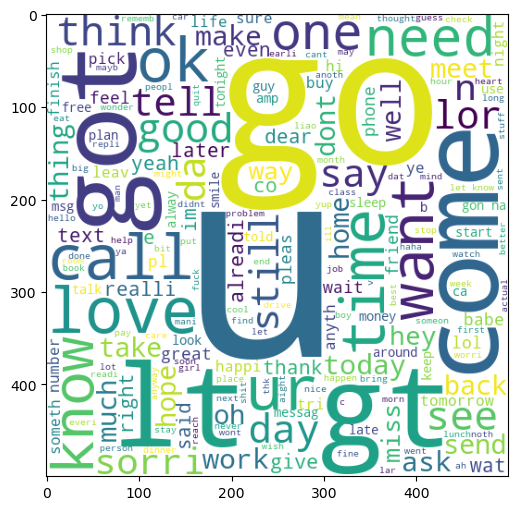

In [82]:

wc=WordCloud(width=500 ,height=500 ,min_font_size=10,background_color='white')
spam_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [83]:
# now we are going to most frequent word in spam

In [86]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist() :
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [87]:
len(spam_corpus) # total words in whole

10106

In [90]:
from collections import Counter # to calculate frequency of each word
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,102


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

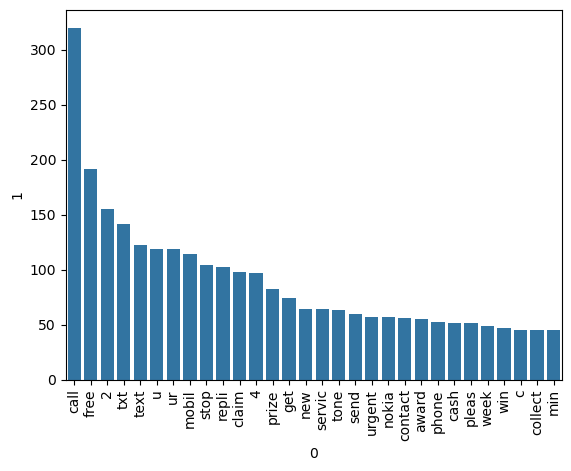

In [94]:
# barplot now
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

# MODEL BUILDING 


In [95]:
# first we will work on naive bayes

In [96]:
#first we will do vectorization

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [165]:
X= tfidf.fit_transform(df['transformed_text']).toarray()  #to convert obtain aparse array to dense array we use toarray function

In [166]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
X.shape

(5168, 3000)

In [168]:
y=df['target'].values

In [169]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [170]:
from sklearn.model_selection import train_test_split # dividing data for training and testing
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #importing accuracy measures

In [171]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [172]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB #importing algos
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [173]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)           

In [174]:
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))        #algo 1

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [175]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))        #algo 2

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [176]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))        #algo 3

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [133]:
# precision here is more important than accuarcy since data is imbalance

In [134]:

# lets see other models

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [178]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

clfs={
    'SVC':svc,
    'KNeighbors':knc,
    'Naivebayes':mnb,
    'DecisionTreeClassifier':dtc,
    'LogisticRegression':lrc,
    'RandomForest':rfc,
    'adaboost':abc,
    'BaggingClassifier':gbc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbc,
    'XGBClassifier':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision
    

In [180]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9700193423597679, 1.0)

In [181]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    ca,pa=train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(ca)
    precision_scores.append(pa)

/Users/shahrukhkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [182]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores})

In [183]:
performance_df

,Algorithm,accuracy,precision
0,SVC,0.976789,0.983471
1,KNeighbors,0.901354,1.000000
2,Naivebayes,0.970019,1.000000
3,DecisionTreeClassifier,0.932302,0.881720
4,LogisticRegression,0.955513,0.961165
5,RandomForest,0.971954,0.991228
6,adaboost,0.960348,0.946429
7,BaggingClassifier,0.949710,0.940594
8,ExtraTreesClassifier,0.973888,0.975000
9,GradientBoostingClassifier,0.949710,0.940594


In [184]:
# to improve lets make max features in tidf 3000
# here 3000 giving better result 

In [185]:
# we are giving importance to precision 
# now we have combination of best performing algorithm :-naivebayes,SVC,extratrees

In [197]:
# our best model is  naivebayes
#due to precision==1 and accuarcy=0.97 


In [198]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

VotingClassifier(estimators=[('naivebayes', MultinomialNB()),
                             ('SVC', SVC(gamma=1.0, kernel='sigmoid')),
                             ('extratrees',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

AttributeError: predict_proba is not available when  probability=False